In [3]:
import numpy as np
import pandas as pd
import os

# Importing custom metric functions from clac_metric.py
from clac_metric import get_metrics


In [55]:

# Load the ground truth data
ground_truth = pd.read_csv('data\B-dataset\drug_dis.csv',header=None).values
# Define the directories containing the prediction files
result_dirs = ['result_LLM', 'result_origin'] 
base_dir = 'result'

# Assuming df is your DataFrame containing the ground truth
ground_truth = ground_truth.flatten()

# Initialize a dictionary to store results for each directory
all_results = {dir: [] for dir in result_dirs}

for model_dir in result_dirs:
    all_results[model_dir] = []
    for i in range(9):  # Assuming 10 files per folder
        prediction_file = f'{base_dir}\{model_dir}\prediction_{i}.npy'

        if os.path.exists(prediction_file):
            try:
                # Load prediction directly
                prediction = np.load(prediction_file).flatten()

                # Calculate metrics
                metrics = get_metrics(ground_truth, prediction)
                all_results[model_dir].append(metrics)
            except Exception as e:
                print(f'Error processing {prediction_file}: {e}')
        else:
            print(f'File not found: {prediction_file}')

# Check the final content of all_results after processing
for dir, results in all_results.items():
    print(f"Final data for {dir}: {results}")

Final data for result_LLM: [[0.5357965343197485, 0.8538638639450038, 0.5165805614231542, 0.8819174199002872, 0.5510968722849696, 0.9246872499052272, 0.4861330650955597], [0.5189417434753286, 0.8498798229946098, 0.5021018672401995, 0.873357287612985, 0.5577758470894874, 0.9141569436839223, 0.45653333333333335], [0.4010090865952745, 0.704816082590561, 0.4326241134751773, 0.8597555668834156, 0.46703953084274547, 0.910527498139646, 0.4029326337487117], [0.5182247102260076, 0.8508038461200892, 0.5034486230680159, 0.8773731521428305, 0.5430060816681147, 0.9206014910913609, 0.4692632566870014], [0.5274522133918794, 0.8631202648082607, 0.5147575299453425, 0.8703049819099601, 0.6008905299739357, 0.9051359813543378, 0.4502217340005696], [0.5178112813169738, 0.8536036890648262, 0.5059257437914925, 0.8750854769927018, 0.5586446568201564, 0.9159962371705769, 0.4622989125550463], [0.5181838450859122, 0.8521934340814358, 0.5054551780699357, 0.8762976961619277, 0.5521828844483058, 0.9182005812729034, 

In [56]:
import pandas as pd
import scipy.stats as stats

def compute_statistics(df):
    # Calculate mean and standard deviation
    mean = df.mean()
    std = df.std()

    # Calculate the 95% Confidence Interval
    ci_lower = mean - 1.96 * std / np.sqrt(len(df))
    ci_upper = mean + 1.96 * std / np.sqrt(len(df))

    return pd.DataFrame({'Mean': mean, 'STD': std, '95% CI Lower': ci_lower, '95% CI Upper': ci_upper})


# Define the headers for the metrics
metric_headers = ["AUPR", "AUC", "F1 Score", "Accuracy", "Recall", "Specificity", "Precision"]
# Create DataFrames with specified headers
results_dfs = {dir: pd.DataFrame(all_results[dir], columns=metric_headers) for dir in all_results}

# Create a new folder named 'metrics_output' in the root directory
output_dir = r'result\metrics_output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save individual metrics and aggregated statistics in the new folder
for dir in result_dirs:
    # Extract the model identifier from the directory name
    model_identifier = dir.split('_')[-1]

    # Define file names for saving CSVs using the model identifier
    individual_metrics_file = os.path.join(output_dir, f'{model_identifier}_individual_metrics.csv')
    aggregated_stats_file = os.path.join(output_dir, f'{model_identifier}_aggregated_statistics.csv')

    # Save individual fold metrics with headers
    results_dfs[dir].to_csv(individual_metrics_file, index=False)
    print(f"Saved individual metrics to {individual_metrics_file}")

    # Calculate and save aggregated statistics
    aggregated_stats = compute_statistics(results_dfs[dir])
    aggregated_stats.to_csv(aggregated_stats_file, index=False)
    print(f"Saved aggregated statistics to {aggregated_stats_file}")

# Display the results in a table format
for dir, stats_df in results_dfs.items():
    print(f"Results for {dir}:")
    display(stats_df)

Saved individual metrics to result\metrics_output\LLM_individual_metrics.csv
Saved aggregated statistics to result\metrics_output\LLM_aggregated_statistics.csv
Saved individual metrics to result\metrics_output\origin_individual_metrics.csv
Saved aggregated statistics to result\metrics_output\origin_aggregated_statistics.csv
Results for result_LLM:


,AUPR,AUC,F1 Score,Accuracy,Recall,Specificity,Precision
0,0.535797,0.853864,0.516581,0.881917,0.551097,0.924687,0.486133
1,0.518942,0.849880,0.502102,0.873357,0.557776,0.914157,0.456533
2,0.401009,0.704816,0.432624,0.859756,0.467040,0.910527,0.402933
3,0.518225,0.850804,0.503449,0.877373,0.543006,0.920601,0.469263
4,0.527452,0.863120,0.514758,0.870305,0.600891,0.905136,0.450222
5,0.517811,0.853604,0.505926,0.875085,0.558645,0.915996,0.462299
6,0.518184,0.852193,0.505455,0.876298,0.552183,0.918201,0.466019
7,0.512562,0.855385,0.499988,0.868825,0.572871,0.907088,0.443557
8,0.527736,0.861263,0.512608,0.869031,0.601596,0.903606,0.446554


Results for result_origin:


,AUPR,AUC,F1 Score,Accuracy,Recall,Specificity,Precision
0,0.511536,0.842654,0.498500,0.870081,0.564020,0.909650,0.446618
1,0.524173,0.856465,0.508347,0.876242,0.558862,0.917274,0.466208
2,0.475422,0.787180,0.482543,0.871101,0.524978,0.915849,0.446456
3,0.519282,0.851700,0.501769,0.874793,0.550717,0.916691,0.460811
4,0.519820,0.854009,0.500129,0.867955,0.576998,0.905571,0.441334
5,0.520642,0.854132,0.503396,0.870442,0.573577,0.908822,0.448516
6,0.539174,0.866005,0.522755,0.876335,0.591605,0.913146,0.468260
7,0.516482,0.843689,0.500919,0.875048,0.547730,0.917365,0.461479
8,0.536496,0.864640,0.518895,0.877013,0.579333,0.915498,0.469876


C:\Users\admin\AppData\Local\Temp\ipykernel_120272\3548598225.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


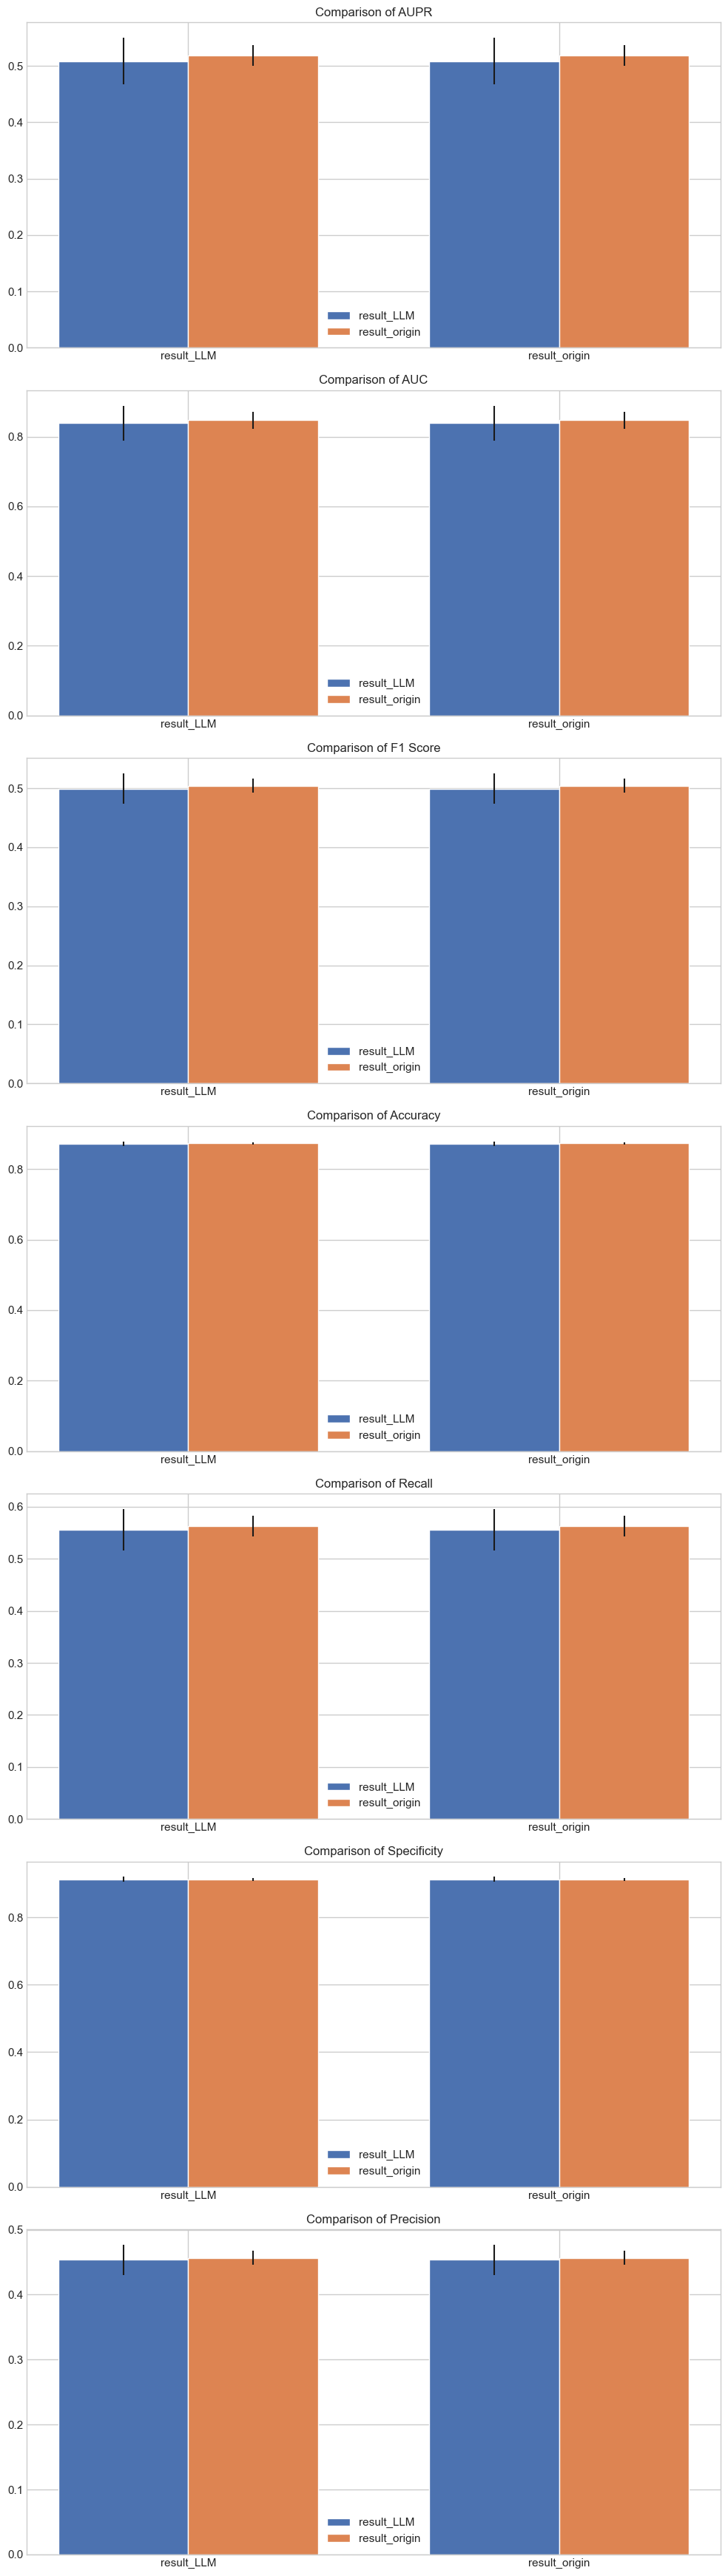

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style for plots
plt.style.use('seaborn-whitegrid')

# Metrics to be compared
metrics = ["AUPR", "AUC", "F1 Score", "Accuracy", "Recall", "Specificity", "Precision"]

# Number of metrics and number of models
n_metrics = len(metrics)
n_models = len(result_dirs)

# Plot settings
fig, axes = plt.subplots(n_metrics, 1, figsize=(10, 5 * n_metrics))

# Width of a bar
bar_width = 0.35

# Iterate through each metric and create a bar plot
for i, metric in enumerate(metrics):
    ax = axes[i]

    # Calculate bar positions
    indexes = np.arange(n_models)

    for j, dir in enumerate(result_dirs):
        means = results_dfs[dir][metric].mean()
        stds = results_dfs[dir][metric].std()

        ax.bar(indexes + j * bar_width, means, bar_width, yerr=stds, label=dir)

    ax.set_title(f'Comparison of {metric}')
    ax.set_xticks(indexes + bar_width / 2)
    ax.set_xticklabels(result_dirs)
    ax.legend()

plt.tight_layout()
plt.show()
